In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# 1. Load the dataset
data = {
    'CustomerID':[1,2,3,4,5,6,7,8,9,10],
    'Annual Income':[15,16,17,18,19,20,21,22,23,24],
    'Spending Score':[39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


Dataset:
   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72


In [9]:
# 2. Select feature
X = df[['Annual Income', 'Spending Score']].values

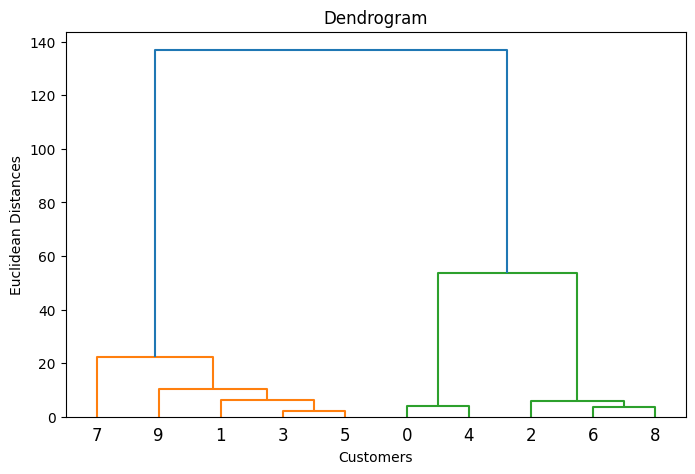

In [10]:
# 3. Generate dendrogram
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [6]:
# 4. Apply Agglomerative Clustering
# Suppose from the dendrogram we decide number of clusters = 3
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = y_hc
print("\nCluster assignments:")
print(df)


Cluster assignments:
   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


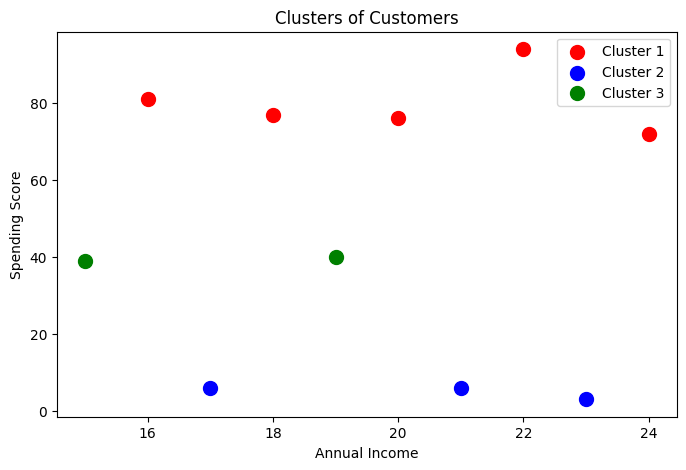

In [11]:
# 5. Visualize Clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [8]:

# 6. Interpret the clusters
# Get summary of each cluster
cluster_summary = df.groupby('Cluster').mean()[['Annual Income','Spending Score']]
print("Cluster Summary (Average values):\n")
print(cluster_summary)

print("\nBusiness Insights:\n")
for cluster in cluster_summary.index:
    income = cluster_summary.loc[cluster, 'Annual Income']
    spending = cluster_summary.loc[cluster, 'Spending Score']

    if income < 18 and spending > 60:
        print(f"Cluster {cluster}: Low Income - High Spending → Enthusiastic spenders. "
              "Offer discounts & loyalty programs.")
    elif income > 20 and spending < 20:
        print(f"Cluster {cluster}: High Income - Low Spending → Potential customers. "
              "Encourage spending with premium offers.")
    else:
        print(f"Cluster {cluster}: Moderate/High Income - High Spending → Ideal customers. "
              "Maintain loyalty with exclusive benefits.")



Cluster Summary (Average values):

         Annual Income  Spending Score
Cluster                               
0            20.000000            80.0
1            20.333333             5.0
2            17.000000            39.5

Business Insights:

Cluster 0: Moderate/High Income - High Spending → Ideal customers. Maintain loyalty with exclusive benefits.
Cluster 1: High Income - Low Spending → Potential customers. Encourage spending with premium offers.
Cluster 2: Moderate/High Income - High Spending → Ideal customers. Maintain loyalty with exclusive benefits.
